In [4]:

!pip show plotly
!pip show matplotlib


Name: plotly
Version: 5.16.1
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: packaging, tenacity
Required-by: 
Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


In [17]:
import pandas as pd

# 'tez.xlsx' dosyasını oku
path_order = 'tez.xlsx'
order_report = pd.read_excel(path_order)

# Verileri göster
print(order_report.head())


     ItemCode  Quantity Document Date  Year  Week
0  AS0001/900       200    24/12/2021  2021    52
1  AS0001/900        60    10/12/2021  2021    50
2  AS9125/300         1    25/11/2021  2021    48
3  AS9125/301         2    25/11/2021  2021    48
4  AS9125/302         1    25/11/2021  2021    48


In [18]:
# 'Year' ve 'Week' sütunlarını sil
order_report = order_report.drop(['Year', 'Week'], axis=1)

# DataFrame'in güncellenmiş halini görüntüle
print(order_report.head())


     ItemCode  Quantity Document Date
0  AS0001/900       200    24/12/2021
1  AS0001/900        60    10/12/2021
2  AS9125/300         1    25/11/2021
3  AS9125/301         2    25/11/2021
4  AS9125/302         1    25/11/2021


     ItemCode  Quantity Document Date
0  AS0001/900       200    24/12/2021
1  AS0001/900        60    10/12/2021
2  AS9125/300         1    25/11/2021
3  AS9125/301         2    25/11/2021
4  AS9125/302         1    25/11/2021
           Quantity
count   8733.000000
mean     338.514485
std      751.442198
min        1.000000
25%       26.000000
50%      150.000000
75%      370.000000
max    12157.000000


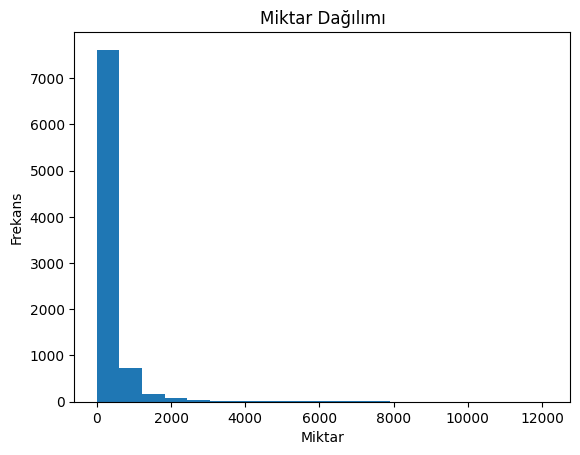

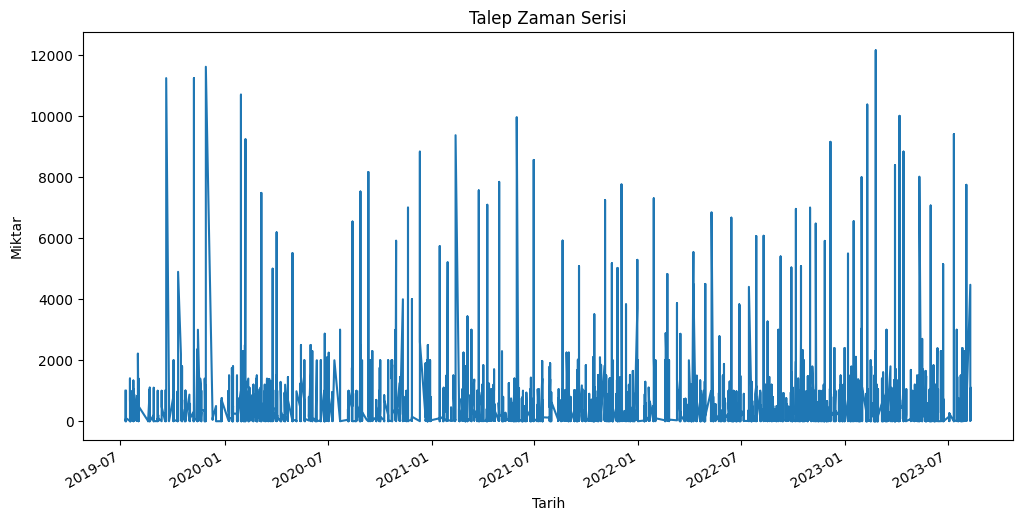

In [19]:
# Verinin başını ve temel istatistikleri görüntüle
print(order_report.head())
print(order_report.describe())

# Histogram ile verinin dağılımını görüntüle
import matplotlib.pyplot as plt
order_report['Quantity'].plot(kind='hist', bins=20)
plt.xlabel('Miktar')
plt.ylabel('Frekans')
plt.title('Miktar Dağılımı')
plt.show()

# Tarih dağılımını görüntüle
order_report['Document Date'] = pd.to_datetime(order_report['Document Date'], dayfirst=True)

order_report.set_index('Document Date', inplace=True)
order_report['Quantity'].plot(figsize=(12, 6))
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.title('Talep Zaman Serisi')
plt.show()


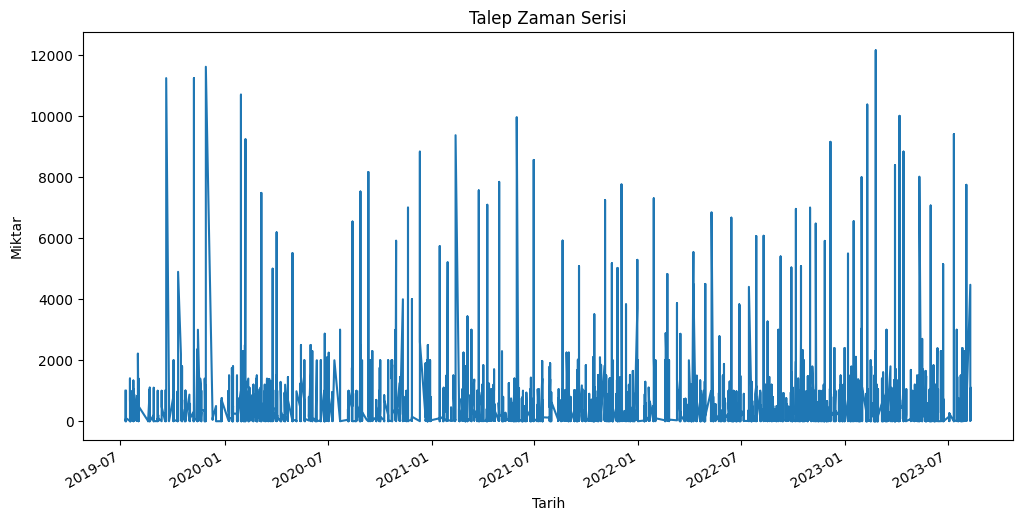

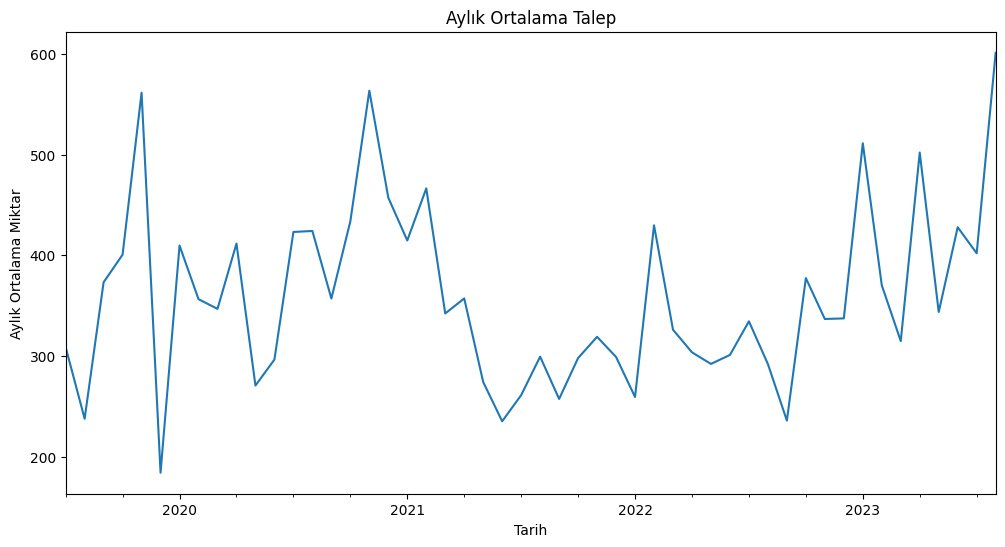

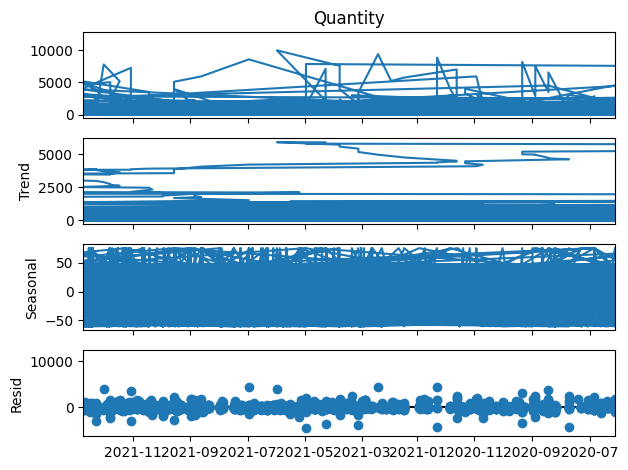

In [20]:




# Talep zaman serisini çizdirin
order_report['Quantity'].plot(figsize=(12, 6))
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.title('Talep Zaman Serisi')
plt.show()

# Aylık ortalama talebi görüntüle
monthly_avg = order_report['Quantity'].resample('M').mean()
monthly_avg.plot(figsize=(12, 6))
plt.xlabel('Tarih')
plt.ylabel('Aylık Ortalama Miktar')
plt.title('Aylık Ortalama Talep')
plt.show()

# Zaman serisi verisini detrend etme
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(order_report['Quantity'], model='additive', period=30)  # "period" kullanılır, "freq" değil.
fig = decomposition.plot()
plt.show()


In [21]:
# Aykırı değerleri tespit etme
Q1 = order_report['Quantity'].quantile(0.25)
Q3 = order_report['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_report[(order_report['Quantity'] < lower_bound) | (order_report['Quantity'] > upper_bound)]
print('Aykırı Değerler:')
print(outliers)

# Eksik verileri kontrol etme
missing_data = order_report.isnull().sum()
print('Eksik Veri Sayısı:')
print(missing_data)


Aykırı Değerler:
                 ItemCode  Quantity
Document Date                      
2021-12-10     AS9500/017      1766
2021-05-31     AS9500/909      1007
2022-04-29     TS4832/000      4500
2021-08-20     AS0001/060      1000
2021-08-31     AS0001/060      1229
...                   ...       ...
2023-02-26     ST0002/020       920
2022-04-26     XG0040/300      1000
2023-01-16     ST9500/010      6555
2023-01-06     ST9500/008      4913
2021-10-13     UK0056/001      1000

[717 rows x 2 columns]
Eksik Veri Sayısı:
ItemCode    0
Quantity    0
dtype: int64


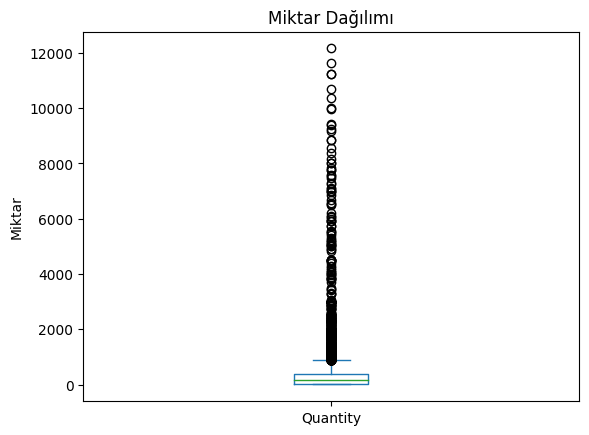

Ortalama Miktar: 338.5144852856979
Medyan Miktar: 150.0
Standart Sapma Miktar: 751.4421976967635


In [22]:
# Veri dağılımını inceleme
order_report['Quantity'].plot(kind='box')
plt.ylabel('Miktar')
plt.title('Miktar Dağılımı')
plt.show()

# Temel istatistikleri görüntüleme
mean_quantity = order_report['Quantity'].mean()
median_quantity = order_report['Quantity'].median()
std_quantity = order_report['Quantity'].std()
print('Ortalama Miktar:', mean_quantity)
print('Medyan Miktar:', median_quantity)
print('Standart Sapma Miktar:', std_quantity)


#Ortalama Miktar (Mean): Veri setinizdeki tüm "Miktar" değerlerinin toplamının, veri sayısına bölünmesiyle hesaplanır. Ortalama, verilerin genel merkezi eğilimini gösterir. Bu durumda, ortalama miktar 338.51'dir. Yani veri setinizdeki ortalama talep miktarı yaklaşık olarak 338.51'dir.

Medyan Miktar (Median): Veri setinizdeki "Miktar" değerlerini sıraladığınızda, ortadaki değeri ifade eder. Medyan, verilerin merkezi eğilimini gösteren başka bir ölçüdür ve aykırı değerlerin etkisini azaltır. Bu durumda, medyan miktar 150.00'dir. Yani veri setinizdeki talep miktarının yarısı veya daha azı 150 veya daha azdır.

Standart Sapma Miktar (Standard Deviation): Veri noktalarının ortalama etrafındaki dağılımının bir ölçüsüdür. Standart sapma, verilerin ne kadar yayıldığını ve ne kadar değişebileceğini gösterir. Bu durumda, standart sapma miktarı oldukça yüksektir ve 751.44'tür. Yüksek standart sapma, veri noktalarının ortalama etrafında büyük bir varyasyon olduğunu ve talep miktarının genellikle değişken olduğunu gösterir.

Bu istatistikler, talep miktarının veri setinizde geniş bir aralığa sahip olduğunu ve aykırı değerlerin etkisi olduğunu gösteriyor. Ortalama ve medyan arasındaki büyük fark, aykırı değerlerin ortalamayı etkilediğini gösterirken, standart sapma bu dağılımın ne kadar geniş olduğunu vurguluyor. Veri setinizin daha ayrıntılı analizi, talep miktarındaki değişkenliği ve olası desenleri daha iyi anlamanıza yardımcı olacaktır.

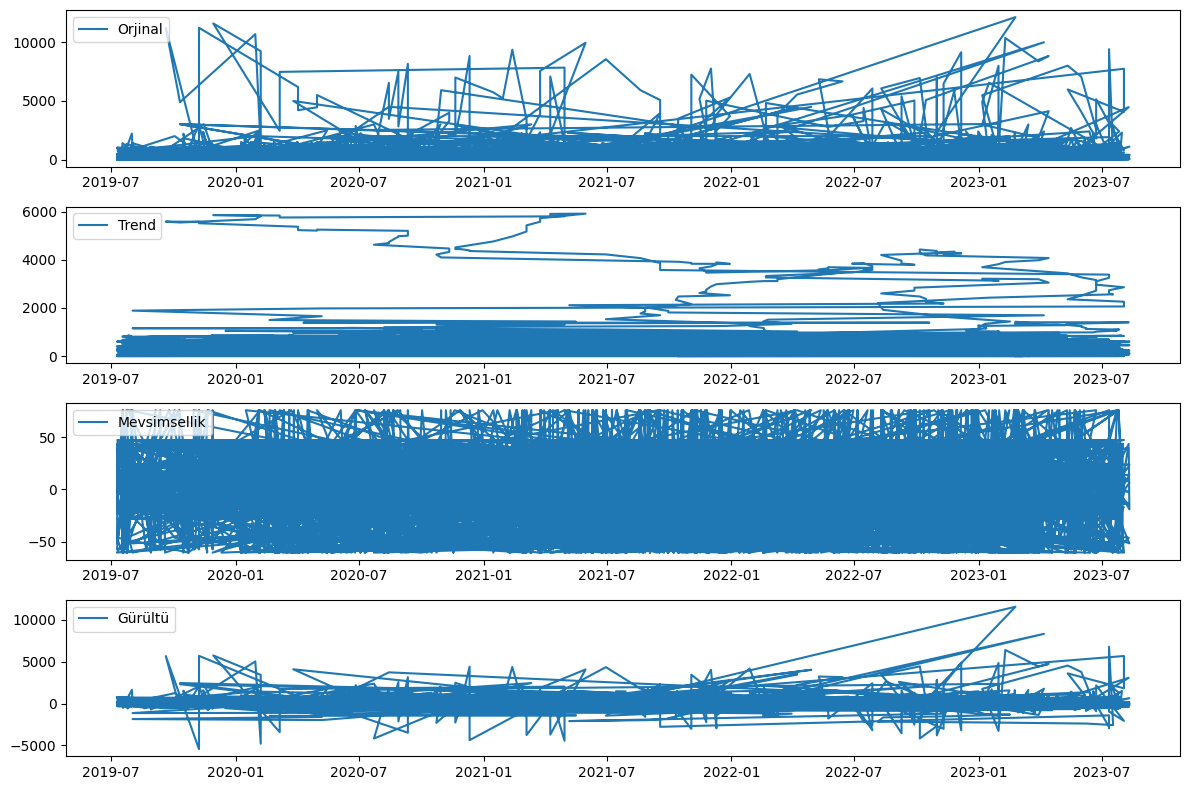

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman serisi ayrıştırma işlemi için veriyi seçin (örneğin, 'Quantity' sütunu)
time_series = order_report['Quantity']

# Zaman serisi ayrıştırma işlemi
decomposition = seasonal_decompose(time_series, model='additive', period=30)

# Ayrıştırılmış bileşenleri alın
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Ayrıştırılmış bileşenleri görselleştirin
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time_series, label='Orjinal')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Mevsimsellik')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Gürültü')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [25]:
order_report.sort_values(by='Document Date', inplace=True)


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
order_report['Quantity'] = scaler.fit_transform(order_report[['Quantity']])


In [27]:
# Örneğin, son 10 gözlemi test verisi olarak ayırma
train_data = order_report[:-10]
test_data = order_report[-10:]


In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Veriyi zaman serisine dönüştürme ve trendi çıkarma
time_series = order_report['Quantity']

# Çapraz doğrulama için zaman serisini bölmek
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Model seçenekleri
models = {
    'ARIMA': (0, 1, 1),    # Örnek ARIMA(p, d, q) parametreleri
    'SARIMA': (1, 1, 1, 12)  # Örnek SARIMA(p, d, q, s) parametreleri
}

best_model = None
best_mse = float('inf')

# Çapraz doğrulama ile farklı modelleri değerlendirme
for model_name, model_params in models.items():
    mse_scores = []  # Her bölme için hata karelerini saklamak için bir liste

    for train_index, test_index in tscv.split(time_series):
        train_data, test_data = time_series[train_index], time_series[test_index]

        # Modeli oluşturma ve eğitme
        if model_name == 'ARIMA':
            model = ARIMA(train_data, order=model_params)
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test_data))
        elif model_name == 'SARIMA':
            p, d, q, s = model_params  # Parametreleri ayırma
            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(0, 1, 1, s))  # Mevsimsel parametre ekleniyor
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test_data))

        # Hata karelerini hesaplama
        mse = mean_squared_error(test_data, predictions)
        mse_scores.append(mse)

    # Çapraz doğrulama sonucunda ortalama hata karelerini hesaplama
    avg_mse = sum(mse_scores) / len(mse_scores)

    # En iyi modeli seçme
    if avg_mse < best_mse:
        best_model = (model_name, model_params)
        best_mse = avg_mse

print(f"En iyi model: {best_model[0]}({best_model[1]})")
print(f"Ortalama MSE: {best_mse}")


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

En iyi model: ARIMA((0, 1, 1))
Ortalama MSE: 0.003643312472555642


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                 8721
Model:                 ARIMA(1, 1, 1)   Log Likelihood               11940.708
Date:                Thu, 05 Oct 2023   AIC                         -23875.416
Time:                        22:25:02   BIC                         -23854.196
Sample:                             0   HQIC                        -23868.184
                               - 8721                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0789      0.006     12.221      0.000       0.066       0.091
ma.L1         -0.9981      0.001  -1205.464      0.000      -1.000      -0.996
sigma2         0.0038   9.27e-06    408.168      0.0

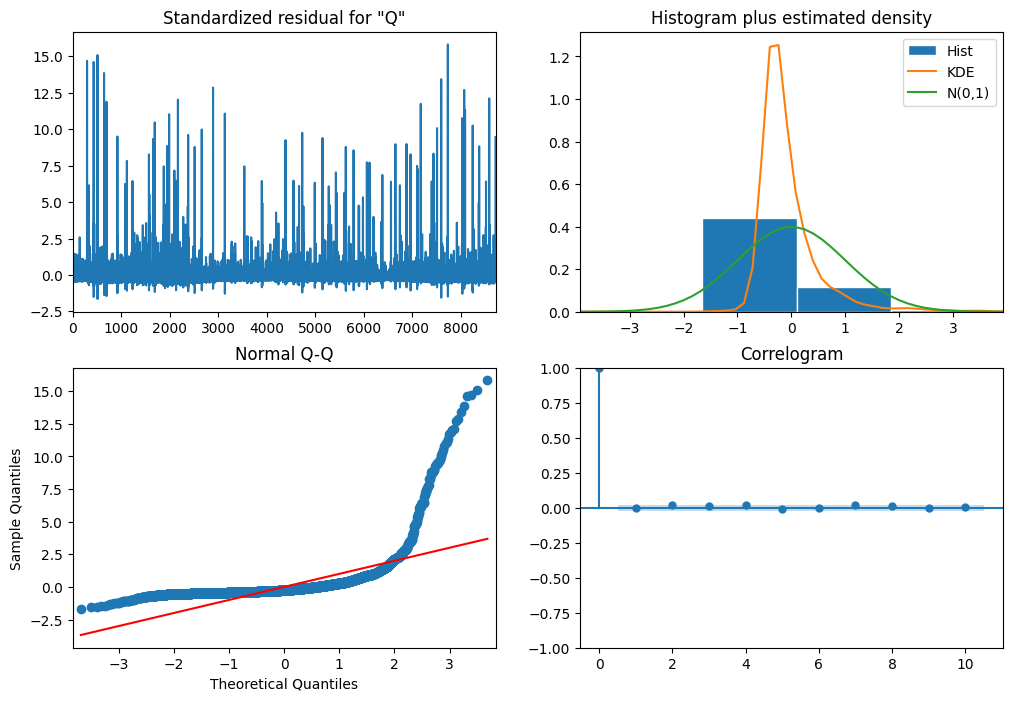

c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


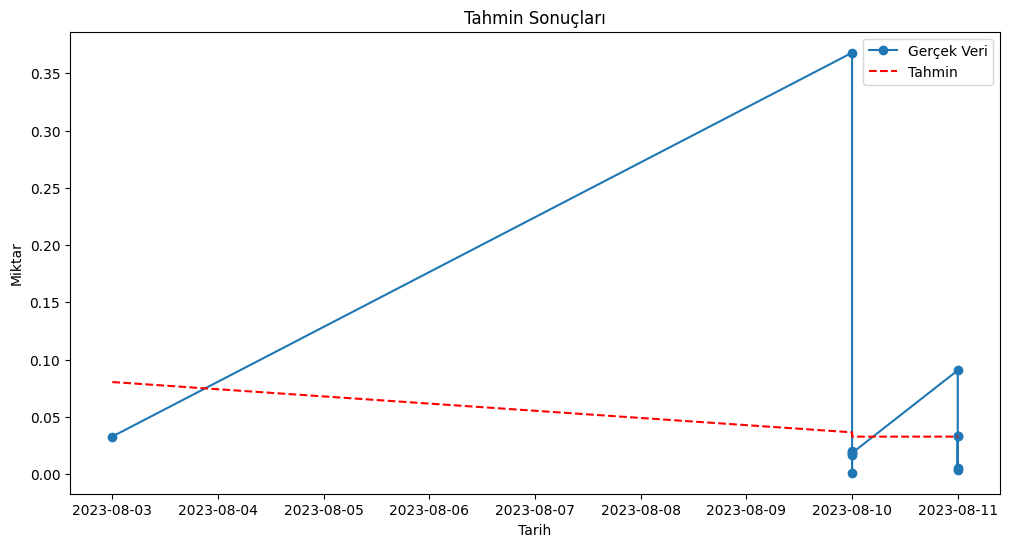

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Eğitim verilerini ve test verilerini ayırın (örneğin, son 12 ayı test verisi olarak kullanabilirsiniz)
train_data = order_report['Quantity'][:-12]
test_data = order_report['Quantity'][-12:]

# Seçtiğiniz modeli oluşturun ve eğitin
model_name = 'ARIMA'  # veya 'SARIMA' olarak ayarlayın
model_params = (1, 1, 1)  # Model parametrelerini belirleyin (örneğin, ARIMA(1,1,1))
if model_name == 'ARIMA':
    model = ARIMA(train_data, order=model_params)
    model_fit = model.fit()
elif model_name == 'SARIMA':
    p, d, q, s = model_params  # Parametreleri ayırın
    model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(0, 1, 1, 12))  # Örnek mevsimsel parametreler
    model_fit = model.fit()

# Modelin istatistiksel özetini görüntüleyin
print(model_fit.summary())

# Modelin eğitim sonucunu inceleyin (örneğin, modelin ACF ve PACF grafikleri)
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

# Modeli kullanarak gelecekteki talepleri tahmin edin
forecast_steps = len(test_data)
predictions = model_fit.forecast(steps=forecast_steps)

# Tahmin sonuçlarını ve gerçek verileri karşılaştırın
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Gerçek Veri', marker='o')
plt.plot(test_data.index, predictions, label='Tahmin', linestyle='--', color='red')
plt.xlabel('Tarih')
plt.ylabel('Miktar')
plt.title('Tahmin Sonuçları')
plt.legend()
plt.show()


In [36]:
import numpy as np

# Tahminleri yapın
test_predictions = model_fit.forecast(steps=len(test_data))

# Gerçek değerlerle tahminleri karşılaştırın
mse = mean_squared_error(test_data, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, test_predictions)

# Hata ölçümlerini görüntüleyin
print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"Karekök Ortalama Kare Hata (RMSE): {rmse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")


Ortalama Kare Hata (MSE): 0.00991555390238956
Karekök Ortalama Kare Hata (RMSE): 0.0995768743353072
Ortalama Mutlak Hata (MAE): 0.04862613759780998


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [37]:
# Modelinizi kullanarak gelecekteki talepleri tahmin edin
future_forecast = model_fit.forecast(steps=len(test_data))

# Tahminleri bir DataFrame'e dönüştürün
forecast_df = pd.DataFrame(future_forecast, columns=['Tahminler'])

# İlk birkaç tahmini görüntüleyin
print(forecast_df.head())


Empty DataFrame
Columns: [Tahminler]
Index: []


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\yucel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


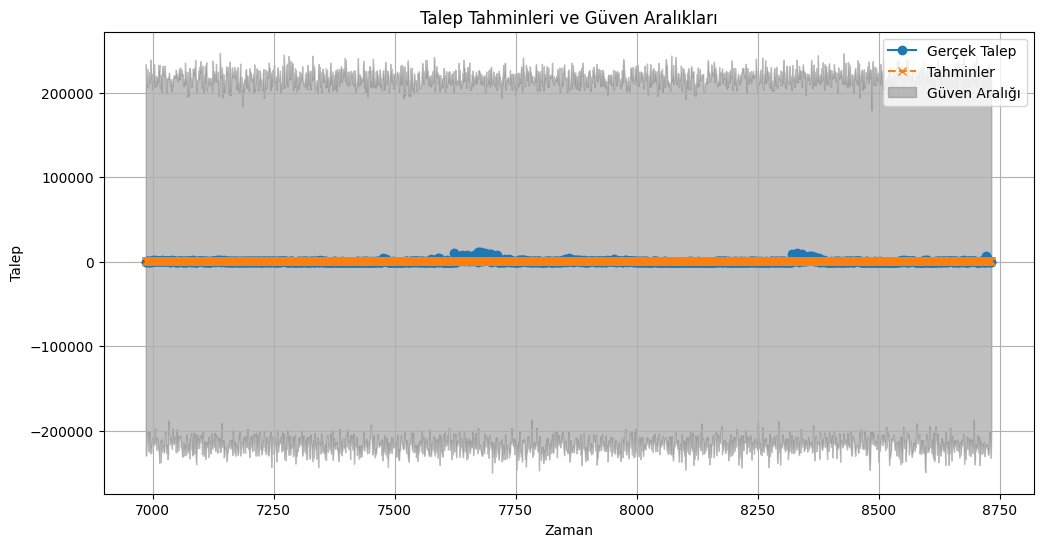

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Veriyi okuyun (Excel dosyanızın adını kullanın)
data = pd.read_excel('tez.xlsx')

# Eğitim ve test verisi olarak ayırın (örnek olarak %80 eğitim, %20 test)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Modeli oluşturun ve eğitin (Exponential Smoothing kullanarak örnek bir model)
model = ExponentialSmoothing(train_data['Quantity'], seasonal='add', seasonal_periods=52)
model_fit = model.fit()

# Tahminleri yapın
forecast = model_fit.forecast(len(test_data))

# Güven aralıklarını hesaplayın (bootstrap yöntemini kullanarak)
n_simulations = 1000  # Simülasyon sayısı
forecast_simulations = []

for i in range(n_simulations):
    # Rastgele hatalar üretin
    residuals = np.random.normal(0, model_fit.sse / (len(model_fit.fittedvalues) - 2), len(test_data))
    simulated_data = model_fit.fittedvalues[-len(test_data):] + residuals

    # Simüle edilmiş tahminleri kaydedin
    forecast_simulations.append(simulated_data.values)

# Güven aralığını hesaplayın
lower_bound = np.percentile(forecast_simulations, 2.5, axis=0)
upper_bound = np.percentile(forecast_simulations, 97.5, axis=0)

# Gerçek değerleri ve tahminleri bir araya getirin
results = pd.concat([test_data[['Quantity']], forecast.to_frame(name='Tahminler')], axis=1)

# Tahminleri ve güven aralıklarını görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Quantity'], label='Gerçek Talep', marker='o')
plt.plot(results.index, results['Tahminler'], label='Tahminler', linestyle='--', marker='x')
plt.fill_between(test_data.index, lower_bound, upper_bound, color='gray', alpha=0.5, label='Güven Aralığı')
plt.xlabel('Zaman')
plt.ylabel('Talep')
plt.title('Talep Tahminleri ve Güven Aralıkları')
plt.legend()
plt.grid(True)
plt.show()
